In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
from PIL import Image, ImageFilter

In [26]:
'''
This analyzes the colors of a single painting from Andy Warhol's Shot Marilyn series. 
'''
# Load the images
light_blue_1 = Image.open('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/light_blue.jpeg')
sage_blue_1 = Image.open('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/sage.jpeg')
red_1 = Image.open('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/red.jpeg')
orange_1 = Image.open('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/orange.jpeg')
turquoise_1 = Image.open('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/turquoise.jpeg')

In [27]:
#reshape array
light_blue_array = np.array(light_blue_1)
sage_array = np.array(sage_blue_1)
red_array = np.array(red_1)
orange_array = np.array(orange_1)
turquoise_array = np.array(turquoise_1)

In [28]:
#convert arrays to 1 dimension
def make_1d_arrays(arrays):
    """Reshape each array in the input list to a 1-dimensional array"""
    result = []
    for array in arrays:
        result.append(array.reshape(array.shape[0] * array.shape[1], array.shape[2]))
    return result

arrays = [light_blue_array, sage_array, red_array, orange_array, turquoise_array]
result = make_1d_arrays(arrays)
light_blue_1d, sage_1d, red_1d, orange_1d, turquoise_1d = result

In [29]:
#perform K-means clustering
kmeans_light_blue = KMeans(n_clusters=5).fit(light_blue_1d)

def make_kmeans_clusters(arrays, n_clusters):
    """Perform KMeans clustering on each array in the input list with the given number of clusters"""
    result = []
    for array in arrays:
        kmeans = KMeans(n_clusters=n_clusters).fit(array)
        result.append(kmeans)
    return result

n_clusters = 5
arrays = [light_blue_1d, sage_1d, red_1d, orange_1d, turquoise_1d]
result = make_kmeans_clusters(arrays, n_clusters)
kmeans_light_blue, kmeans_sage, kmeans_red, kmeans_orange, kmeans_turquoise = result

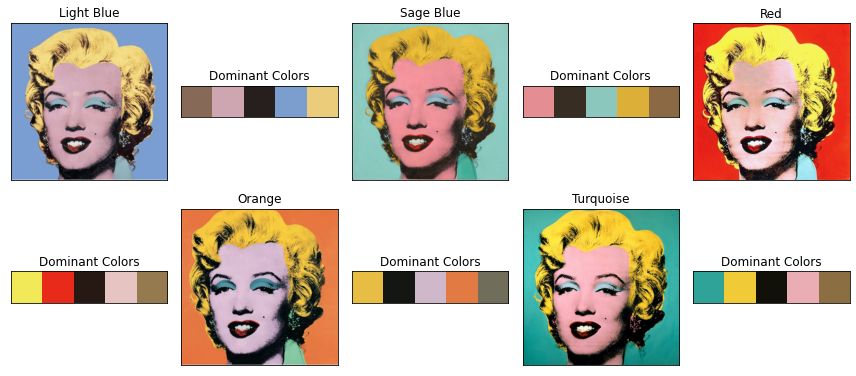

In [30]:
# Get the dominant colors from the clusters
dominant_colors_light_blue = kmeans_light_blue.cluster_centers_
dominant_colors_sage = kmeans_sage.cluster_centers_
dominant_colors_red = kmeans_red.cluster_centers_
dominant_colors_orange = kmeans_orange.cluster_centers_
dominant_colors_turquoise = kmeans_turquoise.cluster_centers_

# Display the dominant colors
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

axs[0, 0].imshow(light_blue_1)
axs[0, 0].set_title('Light Blue')
axs[0, 0].set_xticks([]), axs[0, 0].set_yticks([])

axs[0, 1].imshow(np.uint8([dominant_colors_light_blue]))
axs[0, 1].set_title('Dominant Colors')
axs[0, 1].set_xticks([]), axs[0, 1].set_yticks([])

axs[0, 2].imshow(sage_blue_1)
axs[0, 2].set_title('Sage Blue')
axs[0, 2].set_xticks([]), axs[0, 2].set_yticks([])

axs[0, 3].imshow(np.uint8([dominant_colors_sage]))
axs[0, 3].set_title('Dominant Colors')
axs[0, 3].set_xticks([]), axs[0, 3].set_yticks([])

axs[0, 4].imshow(red_1)
axs[0, 4].set_title('Red')
axs[0, 4].set_xticks([]), axs[0, 4].set_yticks([])

axs[1, 0].imshow(np.uint8([dominant_colors_red]))
axs[1, 0].set_title('Dominant Colors')
axs[1, 0].set_xticks([]), axs[1, 0].set_yticks([])

axs[1, 1].imshow(orange_1)
axs[1, 1].set_title('Orange')
axs[1, 1].set_xticks([]), axs[1, 1].set_yticks([])

axs[1, 2].imshow(np.uint8([dominant_colors_orange]))
axs[1, 2].set_title('Dominant Colors')
axs[1, 2].set_xticks([]), axs[1, 2].set_yticks([])

axs[1, 3].imshow(turquoise_1)
axs[1, 3].set_title('Turquoise')
axs[1, 3].set_xticks([]), axs[1, 3].set_yticks([])

axs[1, 4].imshow(np.uint8([dominant_colors_turquoise]))
axs[1, 4].set_title('Dominant Colors')
axs[1, 4].set_xticks([]), axs[1, 4].set_yticks([])

plt.tight_layout()
plt.show()


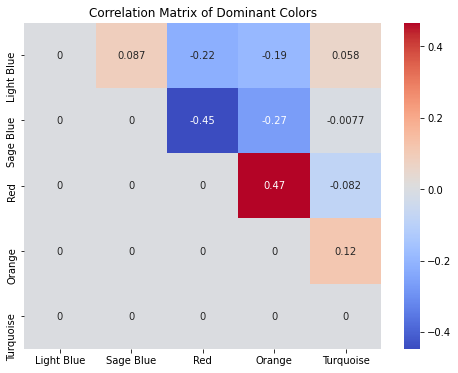

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 5x5 matrix of zeros to hold the correlations
corr_matrix = np.zeros((5,5))

# Fill in the matrix with the correlations
corr_matrix[0,1] = np.corrcoef(dominant_colors_light_blue.flatten(), dominant_colors_sage.flatten())[0,1]
corr_matrix[0,2] = np.corrcoef(dominant_colors_light_blue.flatten(), dominant_colors_red.flatten())[0,1]
corr_matrix[0,3] = np.corrcoef(dominant_colors_light_blue.flatten(), dominant_colors_orange.flatten())[0,1]
corr_matrix[0,4] = np.corrcoef(dominant_colors_light_blue.flatten(), dominant_colors_turquoise.flatten())[0,1]
corr_matrix[1,2] = np.corrcoef(dominant_colors_sage.flatten(), dominant_colors_red.flatten())[0,1]
corr_matrix[1,3] = np.corrcoef(dominant_colors_sage.flatten(), dominant_colors_orange.flatten())[0,1]
corr_matrix[1,4] = np.corrcoef(dominant_colors_sage.flatten(), dominant_colors_turquoise.flatten())[0,1]
corr_matrix[2,3] = np.corrcoef(dominant_colors_red.flatten(), dominant_colors_orange.flatten())[0,1]
corr_matrix[2,4] = np.corrcoef(dominant_colors_red.flatten(), dominant_colors_turquoise.flatten())[0,1]
corr_matrix[3,4] = np.corrcoef(dominant_colors_orange.flatten(), dominant_colors_turquoise.flatten())[0,1]

# Convert the matrix to a pandas DataFrame for easier manipulation
corr_df = pd.DataFrame(corr_matrix, columns=['Light Blue', 'Sage Blue', 'Red', 'Orange', 'Turquoise'], 
                       index=['Light Blue', 'Sage Blue', 'Red', 'Orange', 'Turquoise'])

# Create a heatmap of the correlation matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Dominant Colors')
plt.show()

In [23]:
light_blue = plt.imread('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/light_blue.jpeg')
sage_blue = plt.imread('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/sage.jpeg')
red = plt.imread('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/red.jpeg')
orange = plt.imread('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/orange.jpeg')
turquoise = plt.imread('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/turquoise.jpeg')

def image_analysis(image):
    n_clusters = 5
    rows, cols, channels = image.shape  # get the image shape
    X = image.reshape(rows * cols, channels)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = kmeans.labels_.reshape(rows, cols)
    centers = (kmeans.cluster_centers_ - kmeans.cluster_centers_.min()) / (kmeans.cluster_centers_.max() - kmeans.cluster_centers_.min()) # Normalize centers array to the range 0-1

    unique_labels, counts = np.unique(labels, return_counts=True)
    label_order = np.argsort(counts)[::-1]  # descending order
    unique_labels = unique_labels[label_order]
    counts = counts[label_order]
    percentages = counts / counts.sum() * 100

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 9))

    ax1.imshow(image)
    ax1.axis('off')

    color_labels = [f'{label}:\n{perc:.1f} %' for label, perc in zip(unique_labels, percentages)]
    ax2.pie(counts, labels=color_labels, colors=[centers[label] for label in unique_labels])

    ax3.imshow(centers[labels])
    ax3.axis('off')

    bars = ax4.bar(unique_labels.astype(str), counts, color=[centers[label] for label in unique_labels], edgecolor='black')
    ax4.bar_label(bars, [f'{perc:.1f} %' for perc in percentages])
    for spine in ['top', 'right']:
        ax4.spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()

    return labels, centers, unique_labels, counts

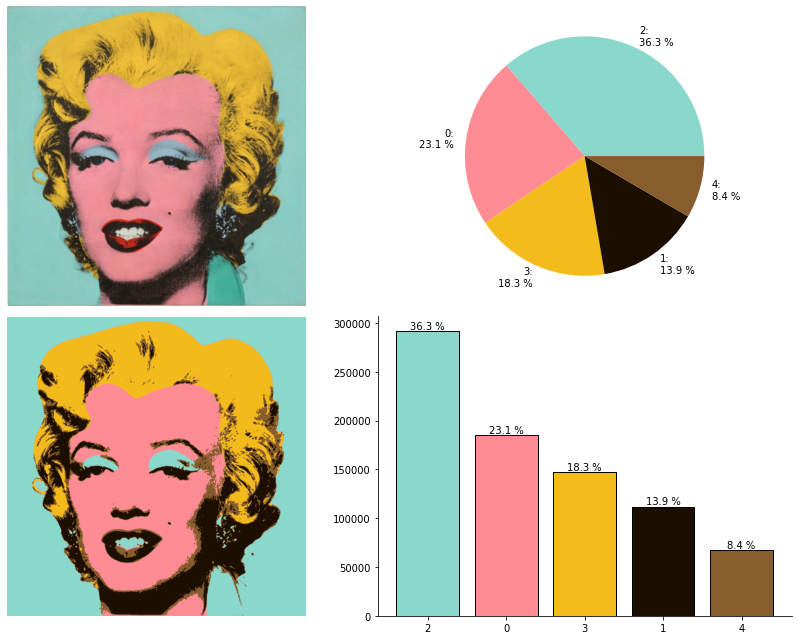

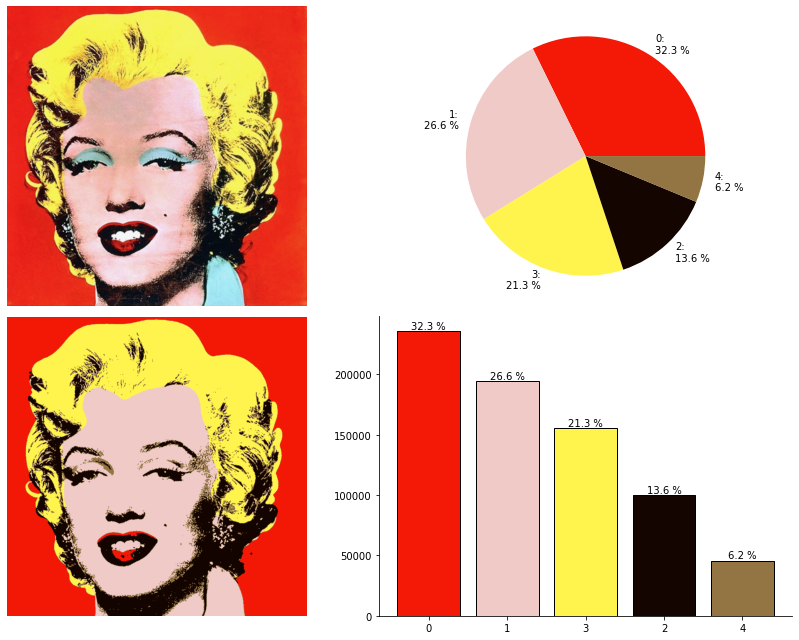

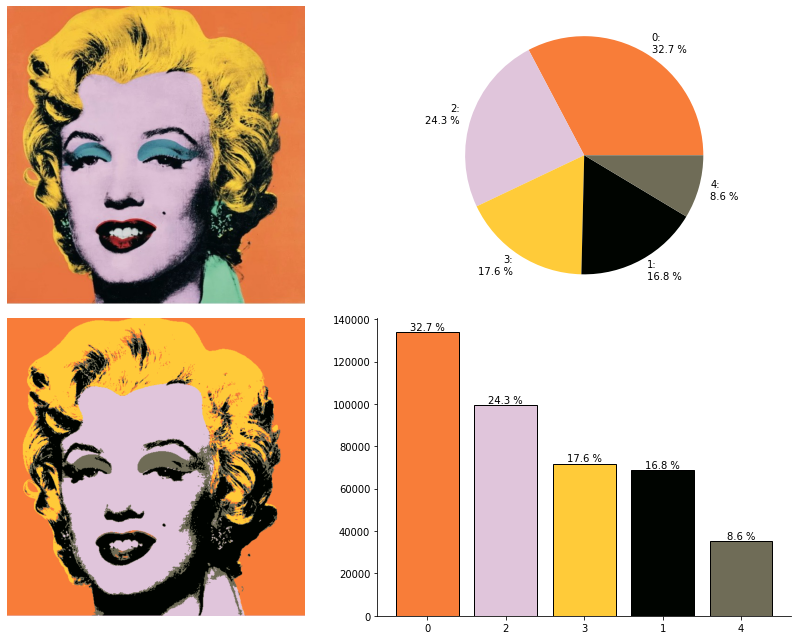

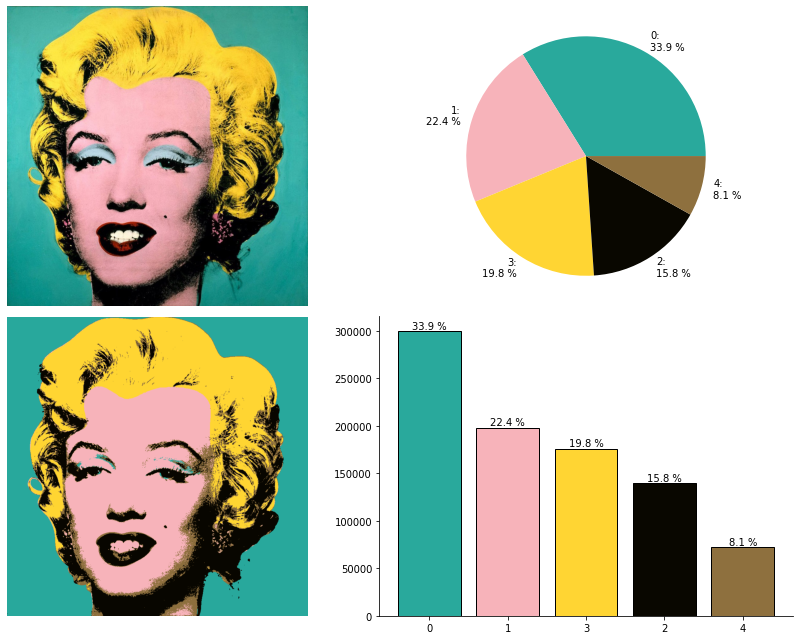

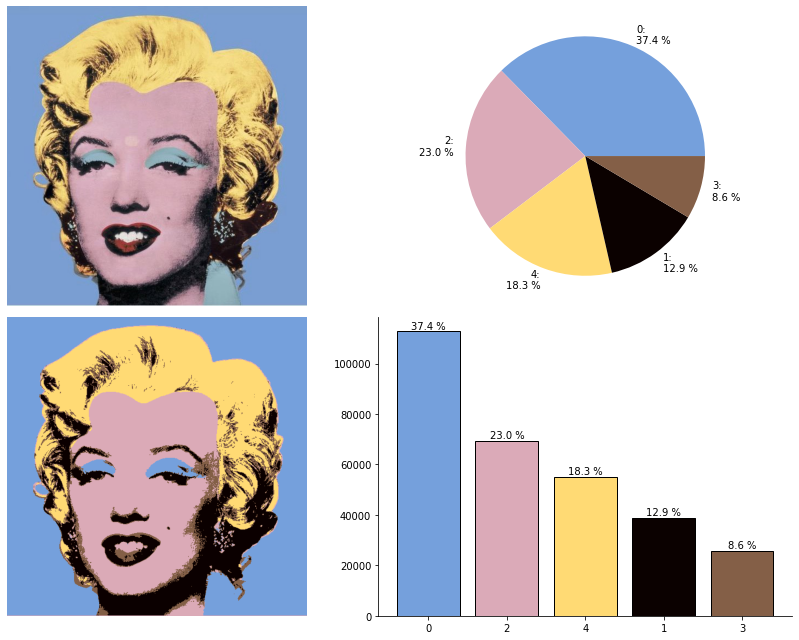

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [2, 2, 2, ..., 2, 2, 2]], dtype=int32),
 array([[0.45884396, 0.62931464, 0.86382105],
        [0.04388878, 0.00356905, 0.        ],
        [0.86068625, 0.66815682, 0.72024245],
        [0.51577453, 0.37292393, 0.27693428],
        [1.        , 0.8561598 , 0.45531139]]),
 array([0, 2, 4, 1, 3], dtype=int32),
 array([113015,  69471,  55218,  38930,  25866]))

In [24]:
image_analysis(sage_blue)
image_analysis(red)
image_analysis(orange)
image_analysis(turquoise)
image_analysis(light_blue)

Text(0.5, 1.0, 'Median Blur 2')

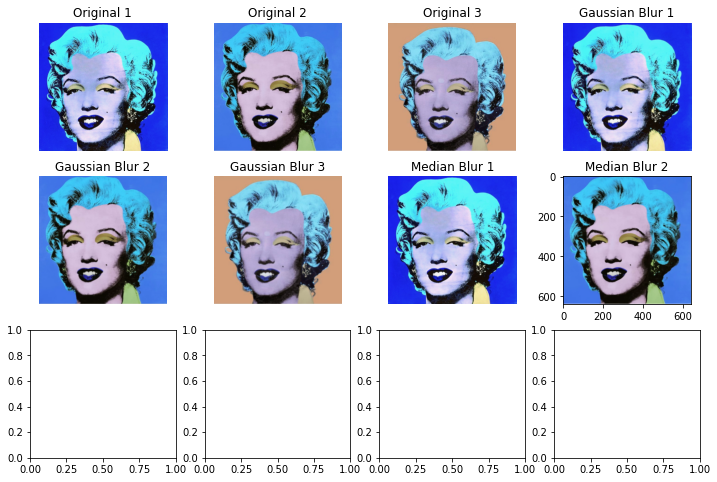

In [10]:
# Apply Gaussian blurring
gaussian_blur1 = cv2.GaussianBlur(red, (5, 5), 0)
gaussian_blur2 = cv2.GaussianBlur(orange, (5, 5), 0)
gaussian_blur3 = cv2.GaussianBlur(light_blue, (5, 5), 0)

# Apply median blurring
median_blur1 = cv2.medianBlur(red, 5)
median_blur2 = cv2.medianBlur(orange, 5)
median_blur3 = cv2.medianBlur(light_blue, 5)

# Apply bilateral blurring
bilateral_blur1 = cv2.bilateralFilter(red, 9, 75, 75)
bilateral_blur2 = cv2.bilateralFilter(orange, 9, 75, 75)
bilateral_blur3 = cv2.bilateralFilter(light_blue, 9, 75, 75)

# Display the original images and blurred images
fig, axs = plt.subplots(3, 4, figsize=(12, 8))

# Original images
axs[0, 0].imshow(cv2.cvtColor(red, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original 1')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(orange, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Original 2')
axs[0, 1].axis('off')

axs[0, 2].imshow(cv2.cvtColor(light_blue, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('Original 3')
axs[0, 2].axis('off')

# Gaussian blurring
axs[0, 3].imshow(cv2.cvtColor(gaussian_blur1, cv2.COLOR_BGR2RGB))
axs[0, 3].set_title('Gaussian Blur 1')
axs[0, 3].axis('off')

axs[1, 0].imshow(cv2.cvtColor(gaussian_blur2, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Gaussian Blur 2')
axs[1, 0].axis('off')

axs[1, 1].imshow(cv2.cvtColor(gaussian_blur3, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Gaussian Blur 3')
axs[1, 1].axis('off')

# Median blurring
axs[1, 2].imshow(cv2.cvtColor(median_blur1, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title('Median Blur 1')
axs[1, 2].axis('off')

axs[1, 3].imshow(cv2.cvtColor(median_blur2, cv2.COLOR_BGR2RGB))
axs[1, 3].set_title('Median Blur 2')


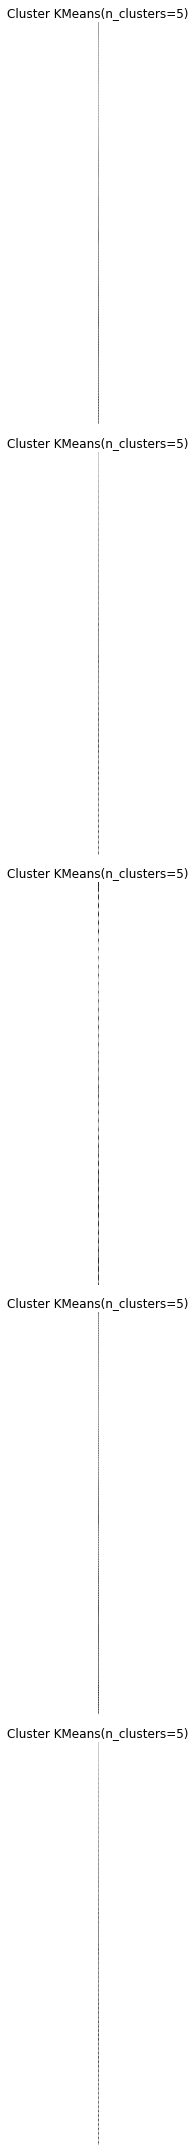

In [21]:
#visually plotting the k-means clusters

images = [light_blue_1d, sage_1d, red_1d, orange_1d, turquoise_1d]  # List of images
cluster_assignments = [kmeans_light_blue, kmeans_sage, kmeans_red, kmeans_orange, kmeans_turquoise]

# Create a dictionary to store indices of images by their cluster assignments
clusters = {}
for i, cluster in enumerate(cluster_assignments):
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(i)

# Visualize the clusters
fig, axs = plt.subplots(nrows=len(clusters), figsize=(10, 6 * len(clusters)))

for i, (cluster, cluster_indices) in enumerate(clusters.items()):
    axs[i].set_title(f"Cluster {cluster}")
    axs[i].axis('off')

    # Plot a random subset of images from each cluster
    random_indices = np.random.choice(cluster_indices, size=min(len(cluster_indices), 9), replace=False)
    for j, index in enumerate(random_indices):
        image = images[index]

        # Check if the image is grayscale (2D array) or RGB (3D array)
        if len(image.shape) == 2:
            axs[i].imshow(image, cmap='gray')
        else:
            axs[i].imshow(image)

        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)
        if j == 8:
            break

plt.tight_layout()
plt.show()


In [20]:
print(cluster_assignments)

[KMeans(n_clusters=5), KMeans(n_clusters=5), KMeans(n_clusters=5), KMeans(n_clusters=5), KMeans(n_clusters=5)]
